# import libraries 

In [1]:
!pip install xgboost
# Import libraries for data manipulation and visualization
import pandas as pd   # For data manipulation
import numpy as np    # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization

# Import libraries for machine learning models
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.linear_model import LinearRegression  # Linear Regression model
from sklearn.ensemble import RandomForestRegressor  # Random Forest for regression
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures

# Set plot styles for better visuals
sns.set(style="whitegrid")


# Business understanding 

In this project, we aim to predict laptop prices based on a dataset consisting of 238 entries, each detailing various attributes of laptops, such as brand, specifications, features, and pricing criteria. Understanding the relationship between these factors and laptop prices is crucial for stakeholders, including manufacturers, retailers, and consumers. By applying different predictive models—such as Linear Regression, Random Forest, K-Nearest Neighbors (KNN), Support Vector Regression (SVR), XGBoost, and Polynomial Regression—we seek to uncover insights that can guide pricing strategies and inventory decisions. These models will allow us to evaluate how well different features correlate with price, ultimately helping to optimize pricing models, improve market competitiveness, and enhance customer satisfaction by ensuring that prices reflect the true value of the laptops based on their specifications. Through this analysis, we aim to provide actionable insights that can support data-driven decision-making in the laptop market.

# DATA understanding 

In [2]:
# Load the dataset 
df = pd.read_csv('laptop_pricing_dataset.csv')

In [3]:
# Preview the data
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [4]:
df[["Category","GPU"]].value_counts()

Category  GPU
3         2      87
4         2      48
3         3      38
          1      29
1         3      14
5         3       9
4         3       8
          1       4
2         2       1
Name: count, dtype: int64

In [5]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [6]:
# null values of the dataset
df.isnull().sum()

Unnamed: 0        0
Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

In [7]:
# null values of the dataset
df.duplicated().sum()

0

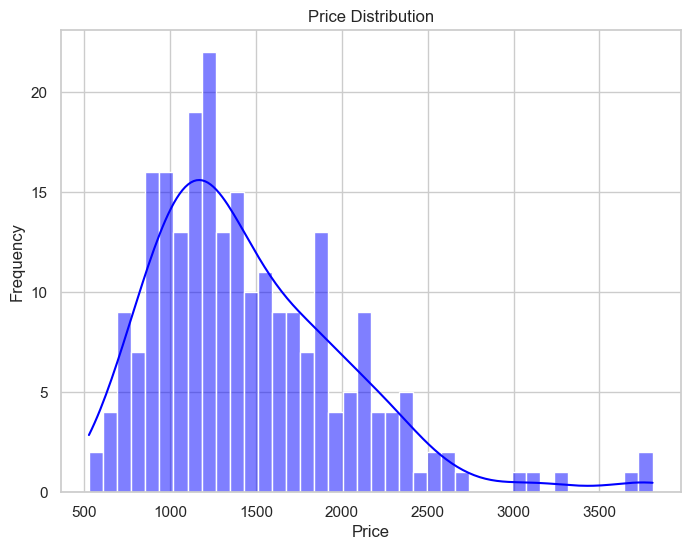

In [8]:
# Distribution plot for Price
plt.figure(figsize=(8,6))
sns.histplot(df['Price'], bins=40, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

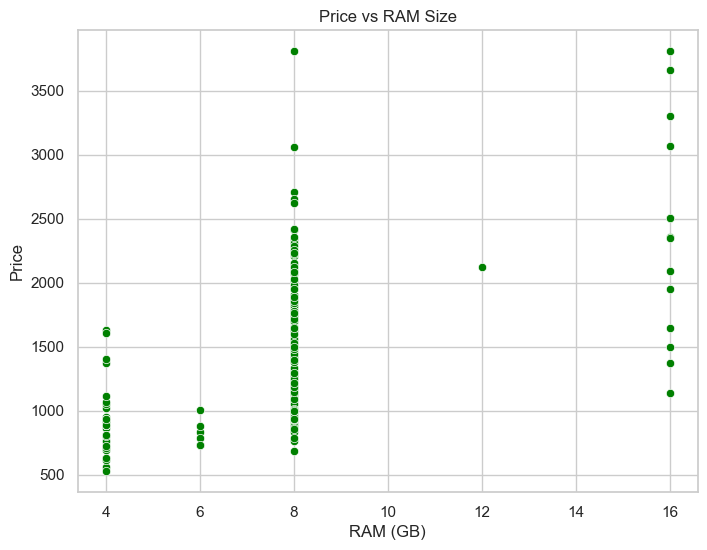

In [9]:
# Scatter plot of Price vs RAM_GB
plt.figure(figsize=(8,6))
sns.scatterplot(x='RAM_GB', y='Price', data=df, color='green')
plt.title('Price vs RAM Size')
plt.xlabel('RAM (GB)')
plt.ylabel('Price')
plt.show()

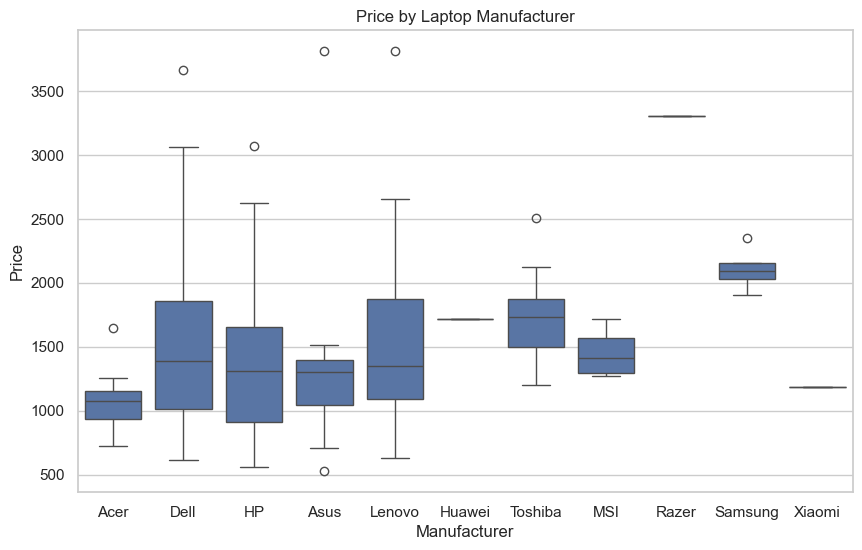

In [10]:
# Box plot of Price by Category
plt.figure(figsize=(10,6))
sns.boxplot(x='Manufacturer', y='Price', data=df)
plt.title('Price by Laptop Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.show()


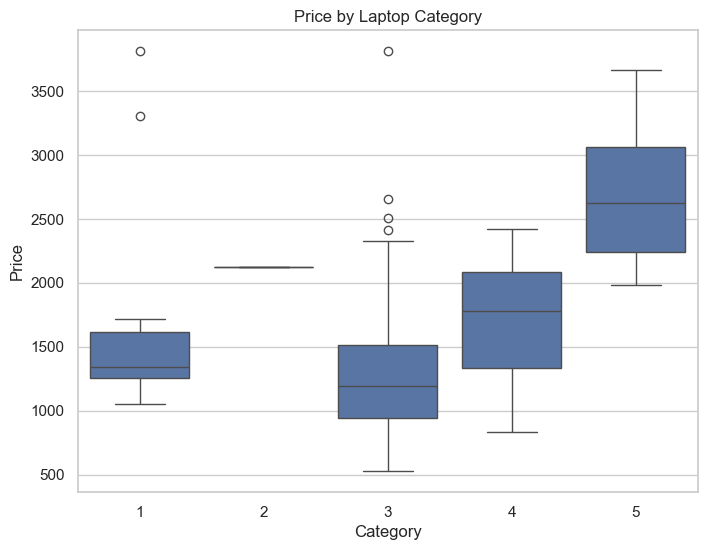

In [11]:
# Box plot of Price by Category
plt.figure(figsize=(8,6))
sns.boxplot(x='Category', y='Price', data=df)
plt.title('Price by Laptop Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()


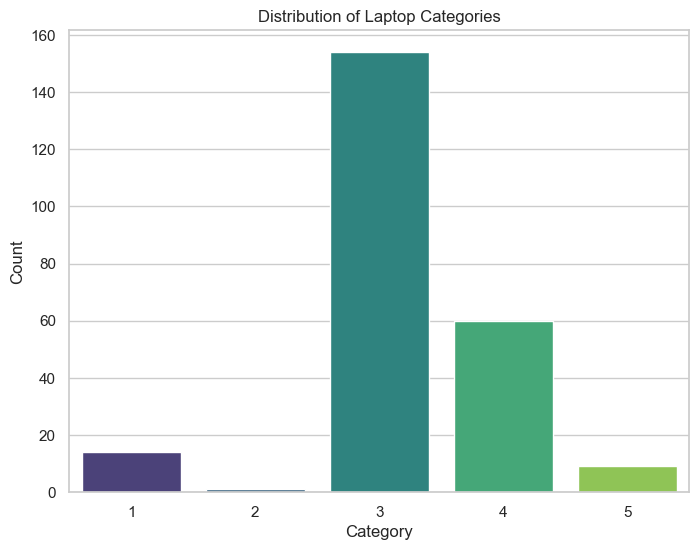

In [12]:
# Plot a count plot (bar plot) for the 'Category' column
plt.figure(figsize=(8,6))
sns.countplot(x='Category', data=df, palette='viridis')

# Add title and labels
plt.title('Distribution of Laptop Categories')
plt.xlabel('Category')
plt.ylabel('Count')

# Show the plot
plt.show()

In [13]:
# Statistical summary
df.describe()

,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238.000000,238.000000,238.000000,238.000000,238.000000,234.000000,238.000000,238.000000,238.000000,233.000000,238.000000
mean,118.500000,3.205882,2.151261,1.058824,5.630252,37.269615,2.360084,7.882353,245.781513,1.862232,1462.344538
std,68.848868,0.776533,0.638282,0.235790,1.241787,2.971365,0.411393,2.482603,34.765316,0.494332,574.607699
min,0.000000,1.000000,1.000000,1.000000,3.000000,30.480000,1.200000,4.000000,128.000000,0.810000,527.000000
25%,59.250000,3.000000,2.000000,1.000000,5.000000,35.560000,2.000000,8.000000,256.000000,1.440000,1066.500000
50%,118.500000,3.000000,2.000000,1.000000,5.000000,38.100000,2.500000,8.000000,256.000000,1.870000,1333.000000
75%,177.750000,4.000000,3.000000,1.000000,7.000000,39.624000,2.700000,8.000000,256.000000,2.200000,1777.000000
max,237.000000,5.000000,3.000000,2.000000,7.000000,43.942000,2.900000,16.000000,256.000000,3.600000,3810.000000


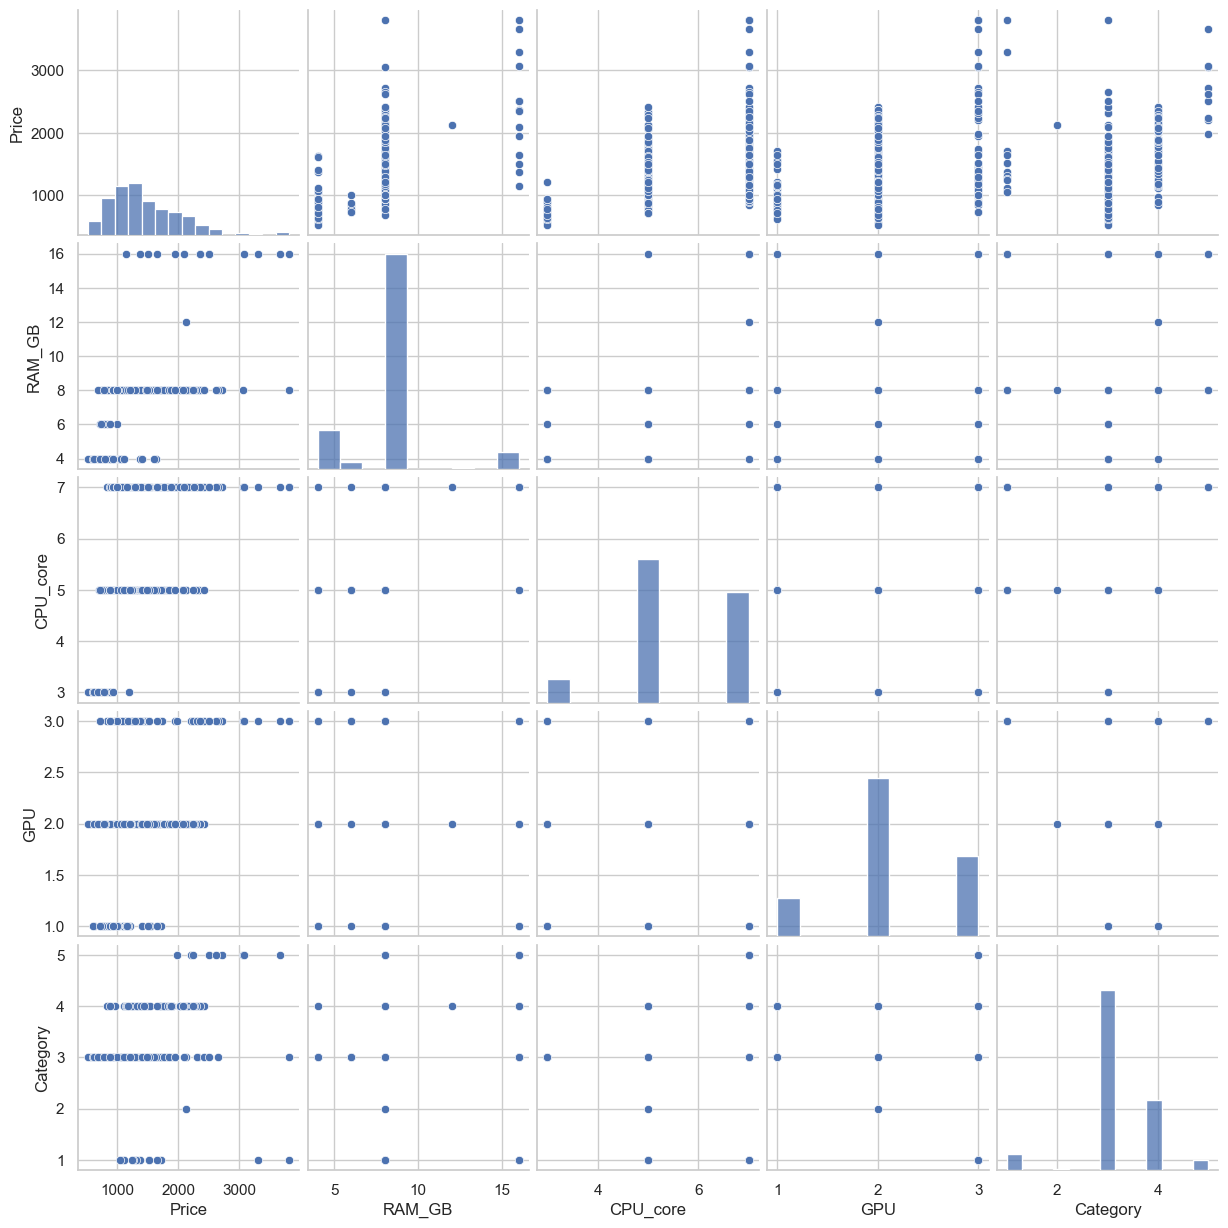

In [14]:
# Pairplot for multiple variables including Price
sns.pairplot(df[['Price', 'RAM_GB', 'CPU_core', 'GPU', 'Category']])
plt.show()


# DATA preperation  

In [15]:
# Drop the Unnamed column if it's present
df_cleaned = df.drop(['Unnamed: 0'], axis=1)
df_cleaned 

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
...,...,...,...,...,...,...,...,...,...,...,...,...
233,Lenovo,4,IPS Panel,2,1,7,35.560,2.6,8,256,1.70,1891
234,Toshiba,3,Full HD,2,1,5,33.782,2.4,8,256,1.20,1950
235,Lenovo,4,IPS Panel,2,1,5,30.480,2.6,8,256,1.36,2236
236,Lenovo,3,Full HD,3,1,5,39.624,2.5,6,256,2.40,883


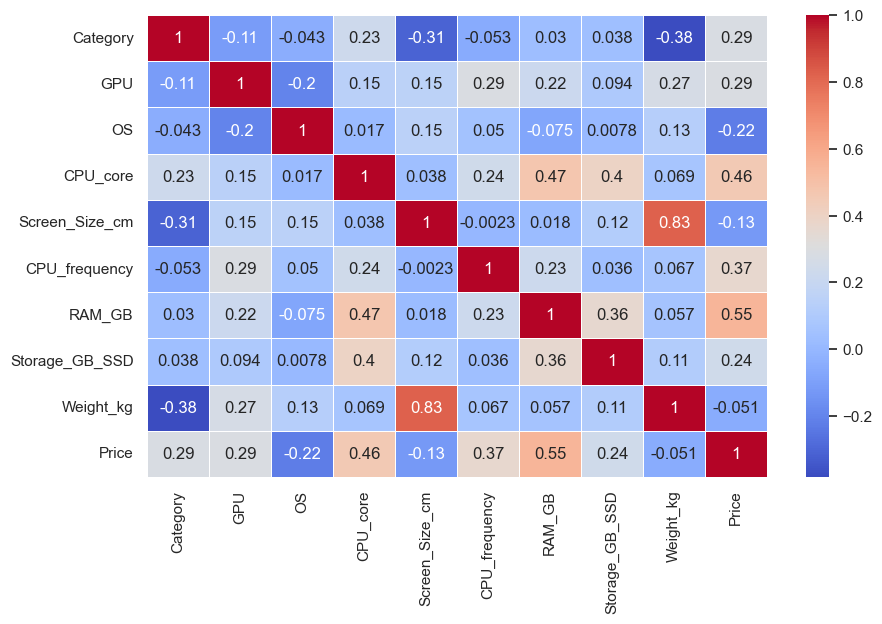

Category          0.286243
GPU               0.288298
OS               -0.221730
CPU_core          0.459398
Screen_Size_cm   -0.128233
CPU_frequency     0.366666
RAM_GB            0.549297
Storage_GB_SSD    0.243421
Weight_kg        -0.050707
Price             1.000000
Name: Price, dtype: float64

In [16]:
# Check for numerical columns in the dataset
numerical_columns = df_cleaned.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numerical_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the plot
plt.show()
corr_matrix['Price']

In [17]:
df_selected = df[[ 'Storage_GB_SSD','Category','GPU','CPU_core', 'CPU_frequency', 'RAM_GB', 'Price']]
df_selected

,Storage_GB_SSD,Category,GPU,CPU_core,CPU_frequency,RAM_GB,Price
0,256,4,2,5,1.6,8,978
1,256,3,1,3,2.0,4,634
2,256,3,1,7,2.7,8,946
3,128,4,2,5,1.6,8,1244
4,256,4,2,7,1.8,8,837
...,...,...,...,...,...,...,...
233,256,4,2,7,2.6,8,1891
234,256,3,2,5,2.4,8,1950
235,256,4,2,5,2.6,8,2236
236,256,3,3,5,2.5,6,883


In [18]:
# Split the data into features (X) and target (y)
X = df_selected.drop('Price', axis=1)  # Features
y = df_selected['Price']  # Target

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Confirm the shapes of the split data
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (142, 6)
Testing data shape: (96, 6)


# modeling 

## Linear Regression Model

In [19]:
# Linear Regression Model


# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)



## Random Forest model

In [20]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)



## Support Victor Machine 

In [21]:
svr = SVR(kernel='rbf')  
svr.fit(X_train, y_train)

# Make predictions
y_pred_svr = svr.predict(X_test)



## XGBoost 

In [22]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')  # You can tune hyperparameters as needed
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)



## DecisionTreeRegressor

In [23]:


# Create and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree MSE: {mse_dt}')
print(f'Decision Tree R-squared: {r2_dt}')

Decision Tree MSE: 227810.22100585434
Decision Tree R-squared: 0.3050350903425638


## KNN KNeighborsRegressor

In [24]:
from sklearn.neighbors import KNeighborsRegressor

# Create and train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)




## Polynomial Regression 

In [25]:

# Create polynomial features
poly = PolynomialFeatures(degree=2)  # You can adjust the degree
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Create and train the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Make predictions
y_pred_poly = poly_model.predict(X_poly_test)



# Evaluation 

In [26]:
# Evaluate the model Polynomial Regression 
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Polynomial Regression MSE: {mse_poly}')
print(f'Polynomial Regression R-squared: {r2_poly}')



# Evaluate the  KNN model  
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f'KNN MSE: {mse_knn}')
print(f'KNN R-squared: {r2_knn}')

# Evaluate the model XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost MSE: {mse_xgb}')
print(f'XGBoost R-squared: {r2_xgb}')
# Evaluate the model SVM
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'SVR MSE: {mse_svr}')
print(f'SVR R-squared: {r2_svr}')

# Evaluate the model-Linear Regression Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression MSE:", mse)
print("Linear Regression R-squared:", r2)

# Evaluate Random Forest model Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MSE:", mse_rf)
print("Random Forest R-squared:", r2_rf)

Polynomial Regression MSE: 201747.46311298883
Polynomial Regression R-squared: 0.38454294606767403
KNN MSE: 172004.00958333333
KNN R-squared: 0.4752792457993966
XGBoost MSE: 186145.0628139981
XGBoost R-squared: 0.43214011122712737
SVR MSE: 328304.82167783106
SVR R-squared: -0.0015368482153010898
Linear Regression MSE: 166472.13753292407
Linear Regression R-squared: 0.4921549458569914
Random Forest MSE: 164806.8460230471
Random Forest R-squared: 0.4972351356685152


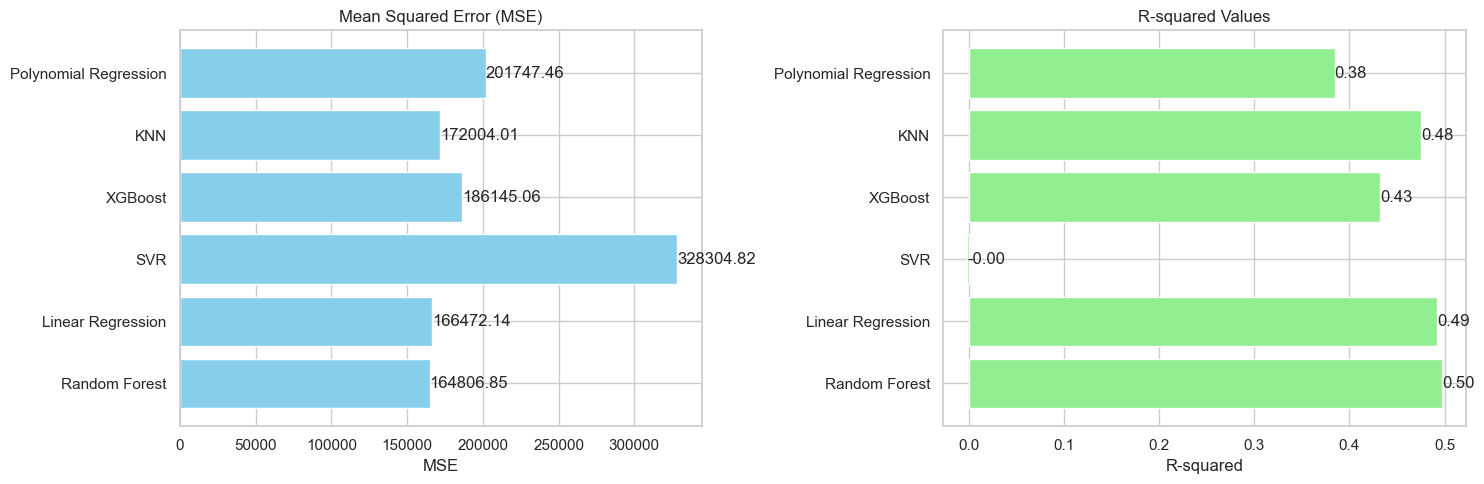

In [27]:
# Collecting MSE and R-squared results
models = [
    "Polynomial Regression",
    "KNN",
    "XGBoost",
    "SVR",
    "Linear Regression",
    "Random Forest"
]

mse_values = [
    mse_poly,
    mse_knn,
    mse_xgb,
    mse_svr,
    mse,
    mse_rf
]

r2_values = [
    r2_poly,
    r2_knn,
    r2_xgb,
    r2_svr,
    r2,
    r2_rf
]

# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot for MSE
axs[0].barh(models, mse_values, color='skyblue')
axs[0].set_title('Mean Squared Error (MSE)')
axs[0].set_xlabel('MSE')
axs[0].invert_yaxis()  # Invert y axis to have the first model on top
# Add MSE values to the bars
for index, value in enumerate(mse_values):
    axs[0].text(value, index, f'{value:.2f}', va='center')  # Format to 2 decimal places

# Bar plot for R-squared
axs[1].barh(models, r2_values, color='lightgreen')
axs[1].set_title('R-squared Values')
axs[1].set_xlabel('R-squared')
axs[1].invert_yaxis()  # Invert y axis to have the first model on top


# Add R-squared values to the bars
for index, value in enumerate(r2_values):
    axs[1].text(value, index, f'{value:.2f}', va='center')  # Format to 2 decimal places

# Show the plots
plt.tight_layout()
plt.show()

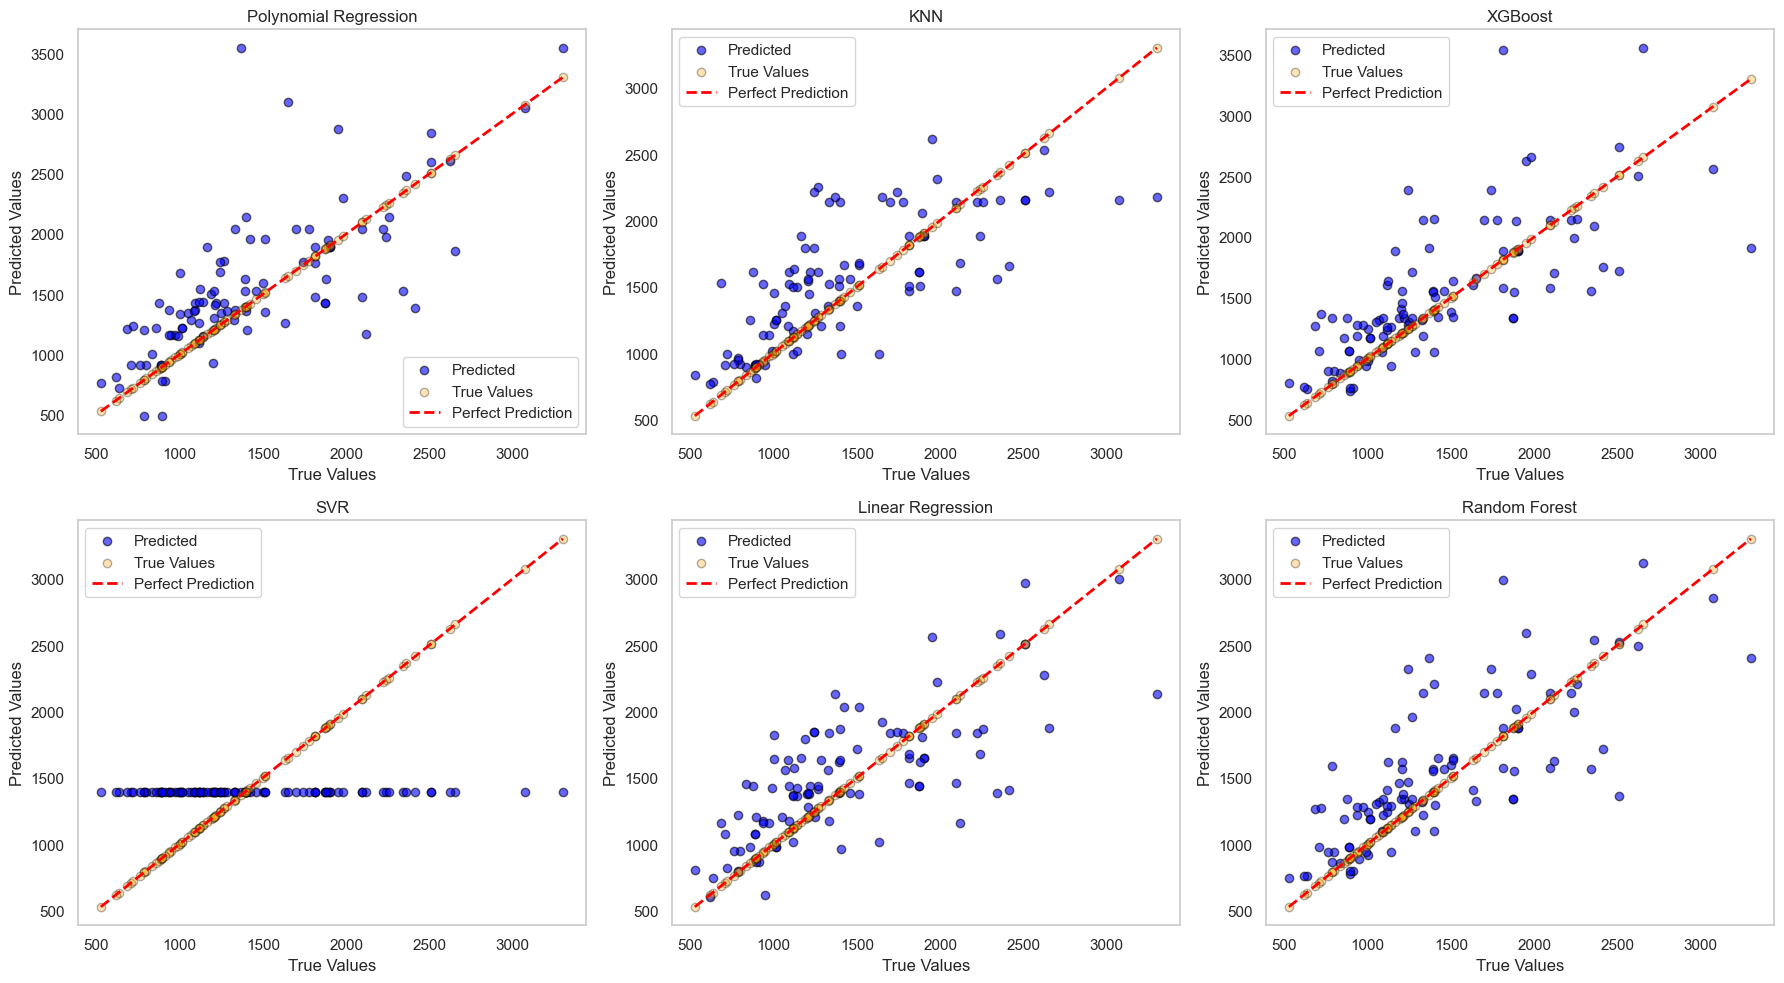

In [28]:
# Create subplots for each model
models = [
    "Polynomial Regression",
    "KNN",
    "XGBoost",
    "SVR",
    "Linear Regression",
    "Random Forest"
]

predictions = [
    y_pred_poly,
    y_pred_knn,
    y_pred_xgb,
    y_pred_svr,
    y_pred,
    y_pred_rf
]

# Set up the figure and axes
fig, axs = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration

# Plot predictions for each model
for ax, model_name, preds in zip(axs, models, predictions):
    # Plotting true values
    ax.scatter(y_test, preds, alpha=0.6, color='blue', label='Predicted', edgecolor='black')
    ax.scatter(y_test, y_test, alpha=0.3, color='orange', label='True Values', edgecolor='black')  # True values
    
    # Perfect prediction line
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--', label='Perfect Prediction')
    
    ax.set_title(model_name)
    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted Values')
    ax.legend()
    ax.grid()

# Adjust layout
plt.tight_layout()
plt.show()

Results Overview
Random Forest:

MSE: 168,614.47
R-squared: 0.4856
Thoughts: The performance is quite similar to the 50% testing split, but the R-squared value decreased slightly. Still, it remains one of the better-performing models, explaining about 48.56% of the variance.
Linear Regression:

MSE: 166,472.14
R-squared: 0.4922
Thoughts: Linear regression now has the lowest MSE and is very close to Random Forest in terms of performance. Its R-squared value is also slightly better, indicating it explains about 49.22% of the variance. This suggests that a linear relationship may adequately capture some patterns in your data.
KNN:

MSE: 172,004.01
R-squared: 0.4753
Thoughts: KNN performed reasonably well but is slightly worse than Linear Regression and Random Forest in this scenario. The R-squared value indicates that it captures about 47.53% of the variance.
XGBoost:

MSE: 186,145.06
R-squared: 0.4321
Thoughts: XGBoost's performance has improved compared to the 50% testing split, with a lower MSE. However, it still lags behind Linear Regression and Random Forest.
Polynomial Regression:

MSE: 201,747.46
R-squared: 0.3845
Thoughts: Polynomial regression shows improved performance in terms of MSE compared to the previous split but remains one of the weaker models with the lowest R-squared value. It suggests that polynomial fitting may not be capturing the underlying relationship well.
Support Vector Regression (SVR):

MSE: 328,304.82
R-squared: -0.0015
Thoughts: SVR continues to perform poorly, with a negative R-squared value indicating it's failing to explain any variance in the target variable. It may need significant tuning or might not be suitable for your dataset.
Key Observations
Performance Consistency: Random Forest, Linear Regression, and KNN are still leading the performance, although their metrics have slightly shifted. Random Forest remains robust, but Linear Regression is catching up with similar metrics.
SVR and Polynomial Regression: Both models still underperform. It may be worth investigating their parameter settings or considering if they're appropriate for the nature of your data.
Recommendations
Focus on Linear Regression and Random Forest: With Linear Regression performing well, consider if it's simpler and easier to interpret than Random Forest for your application. However, Random Forest is likely better for capturing complex relationships.

Cross-Validation: As mentioned previously, performing k-fold cross-validation will give you a better understanding of model performance and may help avoid overfitting, especially with different training/testing splits.

Model Tuning: Experiment with hyperparameter tuning for Random Forest, KNN, and XGBoost to see if performance can be improved. Consider grid search or random search techniques.

Explore Feature Engineering: Delve into feature engineering, as it can significantly improve model performance across the board. Feature selection, creation, and transformation can lead to better predictive power.

Conclusion
The change in testing percentage from 50% to 40% has provided slight shifts in model performance, but the overall picture remains consistent. Random Forest and Linear Regression are strong contenders for the model